<a href="https://colab.research.google.com/github/francesco-source/Machine-Learning/blob/main/Exam_13_01_2022_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam of Machine learning 13/01/2022

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
random_state = 42
np.random.seed(random_state)

## 1. Load the data and explore them, showing size, structure and histograms of numeric data; show the histogram of the frequencies of the class labels contained in the “language” column

In [36]:
data = pd.read_csv("exam2022_01_13.csv")
data.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [37]:
print("The size of the dataset is: ",data.size)

The size of the dataset is:  4277


In [38]:
print("The shape of the data is:",data.shape)

The shape of the data is: (329, 13)


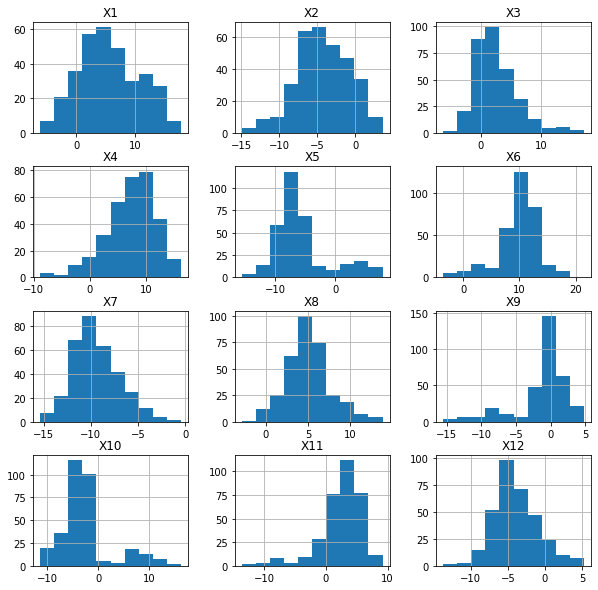

In [39]:
pd.DataFrame.hist(data
                  , figsize = [10,10]
                 );

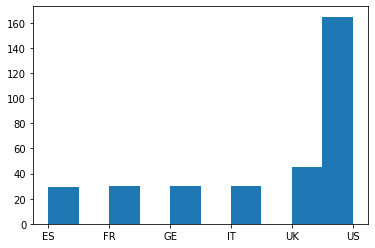

In [40]:
plt.hist(data["language"]);

## 2. Drop the rows with NaN values, if any, show the shape of the dataset after this cleaning

In [41]:
df = data.dropna(axis =0)

In [42]:
print("The shape of the dataset after the drop of Nan values is: ",df.shape)

The shape of the dataset after the drop of Nan values is:  (321, 13)


## 3. tune the hyper–parameters of Model1  = DecisionTreeClassifier with Cross Validation on the training set, optimize for recall_macro

In [43]:
X = df.drop("language",axis = 1)
y = df["language"]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = random_state)

In [44]:
criterions = ["gini","entropy"]
param_grid = {'max_depth': list(range(1,20)),"criterion":criterions}

dt = DecisionTreeClassifier(random_state=random_state)

dt_grid_searccv = GridSearchCV(dt,param_grid=param_grid,scoring="recall_macro",cv =5)

dt_grid_searccv.fit(X_train,y_train)

dt_best = dt_grid_searccv.best_estimator_

y_dt = dt_best.predict(X_test)

print("The best depth is: ",dt_best.get_depth(),".")
print("The best criterion is:",dt_best.get_params()["criterion"])

The best depth is:  7 .
The best criterion is: gini


## 4.  produce a classification report for Model1 on the test set

In [45]:
print("The following is the classification report")
print(classification_report(y_test,y_dt,target_names = np.unique(data["language"].values)))

The following is the classification report
              precision    recall  f1-score   support

          ES       0.78      0.88      0.82         8
          FR       0.50      0.71      0.59         7
          GE       0.33      0.33      0.33         9
          IT       0.36      0.36      0.36        11
          UK       0.20      0.17      0.18         6
          US       0.84      0.78      0.81        40

    accuracy                           0.63        81
   macro avg       0.50      0.54      0.52        81
weighted avg       0.64      0.63      0.63        81



## 5.  produce the confusion matrix for Model1 on the test set

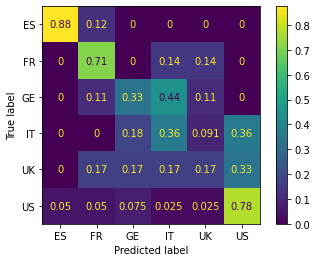

In [46]:
cfm = confusion_matrix(y_test,y_dt,normalize="true")
disp = ConfusionMatrixDisplay.from_estimator(dt_best,X_test,y_test,normalize="true");

## 6.  tune the hyper–parameters of Model2= KNN with Cross Validation on the training set, optimize for recall_macro

In [47]:
knn = KNeighborsClassifier()
tuned_param_knn = [{'n_neighbors': [ 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
model = GridSearchCV(estimator = knn, param_grid=tuned_param_knn, scoring = "recall_macro")
model.fit(X_train,y_train)
knn = model.best_estimator_
y_knn = knn.predict(X_test)



In [48]:
print("The best n_neighbors is:",knn.get_params()["n_neighbors"])

The best n_neighbors is: 3


## 7. produce a classification report for Model2 on the test set

In [49]:
print("The following is the classification report")
print(classification_report(y_test,y_knn,target_names = np.unique(data["language"].values)))

The following is the classification report
              precision    recall  f1-score   support

          ES       0.78      0.88      0.82         8
          FR       0.75      0.86      0.80         7
          GE       0.62      0.89      0.73         9
          IT       0.86      0.55      0.67        11
          UK       0.75      0.50      0.60         6
          US       0.88      0.88      0.88        40

    accuracy                           0.80        81
   macro avg       0.77      0.76      0.75        81
weighted avg       0.81      0.80      0.80        81



## 8. produce the confusion matrix for Model2 on the test set

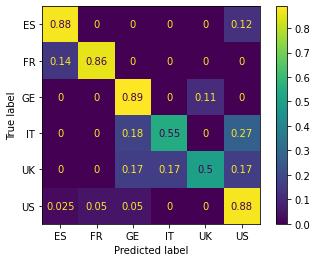

In [50]:
cfm = confusion_matrix(y_test,y_dt,normalize="true")
disp = ConfusionMatrixDisplay.from_estimator(knn,X_test,y_test,normalize="true");

## 9.  Tune the hyper–parameters of Model3 = RandomForest with Cross Validation on the training set, optimize for recall_macro

In [51]:
rf = RandomForestClassifier(random_state=random_state)

parameters = {'max_depth':list(range(1,10)),'n_estimators':list(range(10,100,10))}

rf_grid_searccv = GridSearchCV(rf,param_grid=parameters,scoring="recall_macro")

rf_grid_searccv.fit(X_train,y_train)

rf_best = rf_grid_searccv.best_estimator_

y_rf = rf_best.predict(X_test)


In [52]:
print("The best number of depth: ",rf_best.get_params()["max_depth"])
print("The best number of n_estimators: ",rf_best.get_params()["n_estimators"])

The best number of depth:  9
The best number of n_estimators:  70


## 10.  Produce a classification report for Model3 on the test set

In [53]:
print("The following is the classification report")
print(classification_report(y_test,y_rf,target_names = np.unique(data["language"].values)))

The following is the classification report
              precision    recall  f1-score   support

          ES       1.00      1.00      1.00         8
          FR       1.00      0.57      0.73         7
          GE       0.75      0.33      0.46         9
          IT       0.50      0.45      0.48        11
          UK       0.60      0.50      0.55         6
          US       0.76      0.95      0.84        40

    accuracy                           0.75        81
   macro avg       0.77      0.63      0.68        81
weighted avg       0.76      0.75      0.73        81



## 11. Produce the confusion matrix for Model3 on the test set

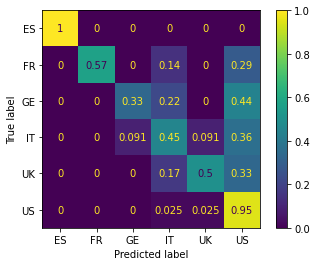

In [54]:
c_f_m = confusion_matrix(y_test,y_rf,normalize="true")
disp = ConfusionMatrixDisplay.from_estimator(rf_best,X_test,y_test,normalize="true")
print(ConfusionMatrixDisplay(c_f_m))

The overall best classification model in this case is KNN, but the ore two classify better some of the languages. 